# Prepping data for use in map visualization

In [1]:
import geopandas as gpd

# Load the geojson file
file_path = '../Misc/California_Fire_Perimeters/California_Fire_Perimeters.geojson'
gdf = gpd.read_file(file_path)

# Filter data for the years 2008 to 2022
filtered_gdf = gdf[(gdf['YEAR_'] >= 2008) & (gdf['YEAR_'] <= 2022)]

# Select only the required fields
fields = ['YEAR_', 'STATE', 'AGENCY', 'UNIT_ID', 'FIRE_NAME', 
                   'INC_NUM', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 
                   'C_METHOD', 'geometry']
filtered_gdf = filtered_gdf[fields]

# Save the filtered data to a new geojson file
output_file_path = 'Resources/Filtered_California_Fire_Perimeters_2008_2022.geojson'
filtered_gdf.to_file(output_file_path, driver='GeoJSON')

output_file_path


'Resources/Filtered_California_Fire_Perimeters_2008_2022.geojson'

In [2]:
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt

gdf_perim = gpd.read_file(r'../Shapefiles/California_Fire_Perimeters_(1950+).shp')

print("\nCalifornia Fire Perimeters (1950+):")
print(gdf_perim.info())

/usr/local/Caskroom/miniforge/base/envs/boot_camp2/lib/python3.12/site-packages/pyogrio/raw.py:196: RuntimeWarning: ../Shapefiles/California_Fire_Perimeters_(1950+).shp contains polygon(s) with rings with invalid winding order. Autocorrecting them, but that shapefile should be corrected using ogr2ogr for example.
  return ogr_read(



California Fire Perimeters (1950+):
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 22261 entries, 0 to 22260
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   YEAR_       22261 non-null  int32   
 1   STATE       22261 non-null  object  
 2   AGENCY      22208 non-null  object  
 3   UNIT_ID     22194 non-null  object  
 4   FIRE_NAME   15672 non-null  object  
 5   INC_NUM     21286 non-null  object  
 6   ALARM_DATE  22261 non-null  object  
 7   CONT_DATE   22261 non-null  object  
 8   CAUSE       22261 non-null  int32   
 9   C_METHOD    22261 non-null  int32   
 10  OBJECTIVE   22261 non-null  int32   
 11  GIS_ACRES   22261 non-null  float64 
 12  COMMENTS    2707 non-null   object  
 13  COMPLEX_NA  596 non-null    object  
 14  IRWINID     2695 non-null   object  
 15  FIRE_NUM    17147 non-null  object  
 16  COMPLEX_ID  360 non-null    object  
 17  DECADES     22261 non-null  int64   
 18  g

Note: This shapefile is too big to fit on a personal github repo.  

It can be obtained from:  

https://gis.data.ca.gov/datasets/CALFIRE-Forestry::california-fire-perimeters-all-1/about

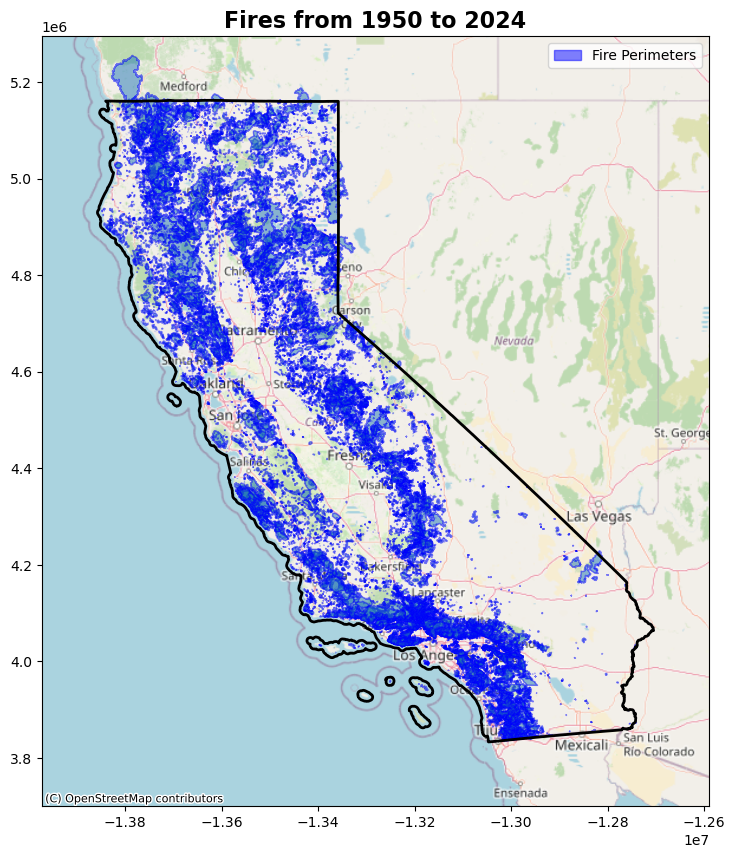

In [3]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import contextily as ctx

# Load the California boundary from the shapefile
gdf_california = gpd.read_file('Resources/ca_state/CA_State.shp')

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the California Fire Perimeters (polygon data)
gdf_perim.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Plot the California boundary as a black line
gdf_california.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

# Calculate bounds with some padding for zooming out
x_min, y_min, x_max, y_max = gdf_california.total_bounds
x_pad = (x_max - x_min) * 0.1  # 10% padding
y_pad = (y_max - y_min) * 0.1  # 10% padding

ax.set_xlim(x_min - x_pad, x_max + x_pad)
ax.set_ylim(y_min - y_pad, y_max + y_pad)


# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_california.crs)

# Create custom legend
fire_perimeters_patch = mpatches.Patch(color='blue', alpha=0.5, label='Fire Perimeters')
ax.legend(handles=[fire_perimeters_patch])

# Add a title
ax.set_title('Fires from 1950 to 2024', fontsize=16, fontweight='bold')

# Save the map as an image
plt.savefig('Outputs/California_Fire_Map.png', dpi=300)

# Show the plot
plt.show()


In [4]:
# Filter the GeoDataFrame for the years 2008 to 2022
gdf_perim_filtered = gdf_perim[(gdf_perim['YEAR_'] >= 2008) & (gdf_perim['YEAR_'] <= 2022)]

# Display the number of entries after filtering
print(f"Number of records from 2008 to 2022: {len(gdf_perim_filtered)}")

Number of records from 2008 to 2022: 5321


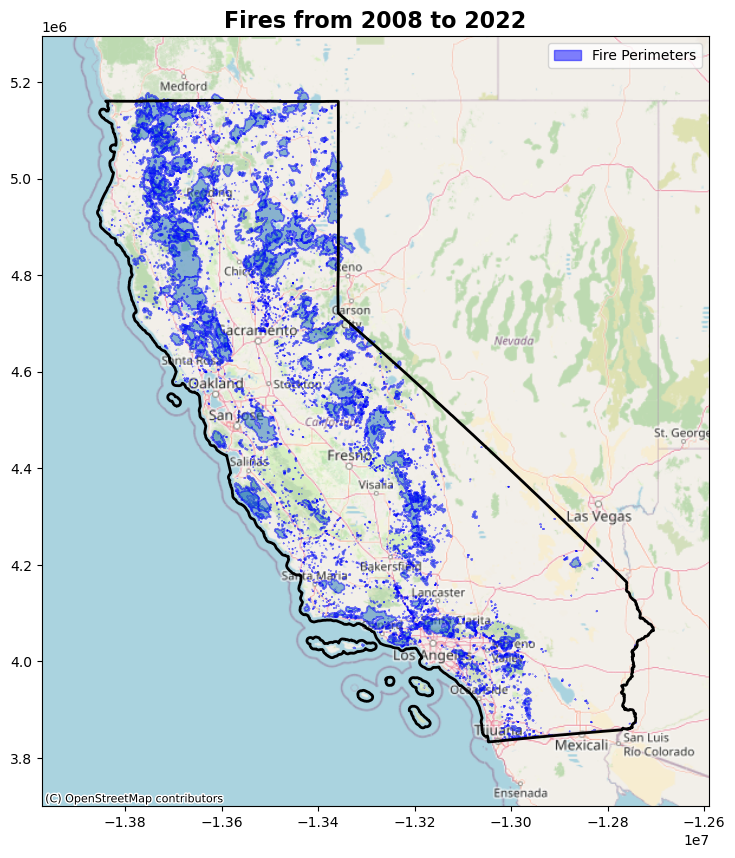

In [5]:
# Load the California boundary from the shapefile
gdf_california = gpd.read_file('Resources/ca_state/CA_State.shp')

# Set the figure size
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the California Fire Perimeters (polygon data)
gdf_perim_filtered.plot(ax=ax, alpha=0.5, edgecolor='blue')

# Plot the California boundary as a black line
gdf_california.boundary.plot(ax=ax, edgecolor='black', linewidth=2)

# Calculate bounds with some padding for zooming out
x_min, y_min, x_max, y_max = gdf_california.total_bounds
x_pad = (x_max - x_min) * 0.1  # 10% padding
y_pad = (y_max - y_min) * 0.1  # 10% padding

ax.set_xlim(x_min - x_pad, x_max + x_pad)
ax.set_ylim(y_min - y_pad, y_max + y_pad)


# Add a basemap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, crs=gdf_california.crs)

# Create custom legend
fire_perimeters_patch = mpatches.Patch(color='blue', alpha=0.5, label='Fire Perimeters')
ax.legend(handles=[fire_perimeters_patch])

# Add a title
ax.set_title('Fires from 2008 to 2022', fontsize=16, fontweight='bold')

# Save the map as an image
plt.savefig('Outputs/California_Fire_Map_2008_2022.png', dpi=300)

# Show the plot
plt.show()

The counties geopackage file that was used here is located at:  
https://gis.data.ca.gov/datasets/8713ced9b78a4abb97dc130a691a8695/explore

In [6]:
# Select the specific columns from the filtered data
gdf_perim_filtered_subset = gdf_perim_filtered[
    ['YEAR_', 'STATE', 'AGENCY', 'FIRE_NAME', 'ALARM_DATE', 'CONT_DATE', 'CAUSE', 'COMMENTS', 'COMPLEX_NA', 'IRWINID', 'FIRE_NUM', 'DECADES', 'geometry']
]


In [7]:
# Read the GeoDataFrame containing county boundaries
gdf_counties = gpd.read_file(r'Resources/California_County_Boundaries.gpkg')

# Perform the spatial join between the fire perimeters and the county boundaries
gdf_perim_with_counties = gpd.sjoin(gdf_perim_filtered_subset, gdf_counties, how="left", predicate="intersects")

# Add a new field 'county_up' and convert all text in 'COUNTY_NAME' to uppercase
gdf_perim_with_counties['county_up'] = gdf_perim_with_counties['COUNTY_NAME'].str.upper()

# Save the updated GeoDataFrame to a GeoJSON file
gdf_perim_with_counties.to_file('Resources/gdf_perim_with_counties_updated.geojson', driver='GeoJSON')

# The resulting GeoDataFrame will include county information and fire details such as 'FIRE_NAME'

In [9]:
gdf_perim_with_counties

,YEAR_,STATE,AGENCY,FIRE_NAME,ALARM_DATE,CONT_DATE,CAUSE,COMMENTS,COMPLEX_NA,IRWINID,...,geometry,index_right,COUNTY_NAME,COUNTY_ABBREV,COUNTY_NUM,COUNTY_CODE,COUNTY_FIPS,ISLAND,GlobalID,county_up
284,2022,CA,CDF,AIRPORT,2022/02/16,2022/02/26,14,None,None,{7AFEDAC3-F210-4FFC-8F27-99560E4BADF6},...,"MULTIPOLYGON (((-13172722.705 4485904.269, -13...",13,Inyo,INY,14,14,027,None,{24BDC0FF-4379-4055-A132-96A222AFA5F5},INYO
285,2022,CA,CDF,DENIZ,2022/05/24,2022/05/24,14,None,None,{FE78908D-7B26-4F0F-8B42-C28B36BADA88},...,"POLYGON ((-13547293.587 4775183.272, -13547306...",3,Butte,BUT,4,04,007,None,{44FBA680-AECC-4E04-A499-29D69AFFBD4A},BUTTE
286,2022,CA,CDF,RANCHO,2022/06/13,2022/06/19,14,None,None,{055F1E57-2DFF-4452-B0AB-71B1E553F1C3},...,"POLYGON ((-13631209.037 4867337.769, -13631198...",51,Tehama,TEH,52,52,103,None,{6D366794-51DC-48B7-81FD-8FBAA1A69238},TEHAMA
287,2022,CA,CDF,TOWER,2022/06/03,2022/06/03,7,None,None,{9C33551B-A0C4-434A-82A7-B38DFE6385A7},...,"POLYGON ((-13625379 4533528, -13625296 4533493...",40,San Mateo,SMT,41,41,081,None,{B4F387B3-07F1-43A1-B18A-A6D81C17E28B},SAN MATEO
288,2022,CA,CDF,BURROWS,2022/06/28,2022/06/29,18,None,None,{43FDB5CA-464E-4066-B928-C68A8F998873},...,"POLYGON ((-13640433.634 4829355.889, -13640424...",10,Glenn,GLE,11,11,021,None,{BAC1DCFD-A28A-4C21-936F-B8E299026A9F},GLENN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5600,2008,CA,USF,NORTH,2008/11/12,2008/11/16,5,None,None,None,...,"POLYGON ((-13403722.94 4677257.982, -13403785....",8,El Dorado,ELD,9,09,017,None,{8C7709F7-3E81-4245-85D6-3FBC6EBD7261},EL DORADO
5601,2008,CA,USF,EAST,1899/12/30,2008/06/29,1,None,IRON COMPLEX,None,...,"POLYGON ((-13692857.04 4989828.407, -13693024....",52,Trinity,TRI,53,53,105,None,{2CDCC639-3309-4168-9D1F-F9C64504994D},TRINITY
5602,2008,CA,USF,STAR,2008/06/21,2008/07/14,1,None,SILVER COMPLEX,None,...,"MULTIPOLYGON (((-13309536.179 4513081.927, -13...",19,Madera,MAD,20,20,039,None,{EF66DAF7-56C7-4AFD-8C10-3C6B8DE83C53},MADERA
5603,2008,CA,CDF,COLEMAN 1,1899/12/30,1899/12/30,14,None,None,None,...,"POLYGON ((-13596427.527 4925654.976, -13596348...",44,Shasta,SHA,45,45,089,None,{23A0546A-1C24-4E60-91E6-7F8E49331ACD},SHASTA


Fire incidence counts by county

In [10]:
# Group by county and aggregate the fire names
fires_by_county_with_names = gdf_perim_with_counties.groupby('COUNTY_NAME').agg({
    'FIRE_NAME': lambda x: ', '.join(set(x.dropna())),  # Combine fire names into a single string
    'FIRE_NUM': 'size'  # Count the number of fires
}).reset_index()

# Rename the columns for clarity
fires_by_county_with_names.rename(columns={'FIRE_NUM': 'fire_count'}, inplace=True)


# Optionally, export to a CSV file
fires_by_county_with_names.to_csv('Outputs/fires_by_county_with_names.csv', index=False)

# Display the result
fires_by_county_with_names.head()

,COUNTY_NAME,FIRE_NAME,fire_count
0,Alameda,"BIRD, EDEN, GRANT, TESLA, MIDWAY, SCU COMPLEX,...",18
1,Alpine,"SILVER KING, CALDOR, SLINKARD, EAST FORK, AIRP...",22
2,Amador,"BELL, CALDOR, LAWRENCE, TONZI, HOYA, GOOSE, SA...",26
3,Butte,"OPHIR, CHINO, LONE, FRIEND-DARNELL, GRIMY, MER...",104
4,Calaveras,"PARROTTS, BLUE, WAVERLY, POOL 2 - MAIN, FRECCE...",49


Counties that had no fire activity from 2008 to 2022

In [11]:
# Perform a left join to include all counties, even those with no fires
counties_with_fire_counts = gdf_counties[['COUNTY_NAME']].merge(fires_by_county_with_names, on='COUNTY_NAME', how='left')

# Fill NaN values in the fire count column with 0 (indicating no fires)
counties_with_fire_counts['fire_count'] = counties_with_fire_counts['fire_count'].fillna(0)

# Filter to get counties with no fires
counties_with_no_fires = counties_with_fire_counts[counties_with_fire_counts['fire_count'] == 0]

# Display or export the result
print(counties_with_no_fires)

# Export to CSV if needed
counties_with_no_fires.to_csv(r'Outputs/counties_with_no_fires.csv', index=False)

      COUNTY_NAME FIRE_NAME  fire_count
37  San Francisco       NaN         0.0


In [12]:
# Group by county and year, and count the number of fire perimeters
fires_by_county_year = gdf_perim_with_counties.groupby(['COUNTY_NAME', 'YEAR_']).size().reset_index(name='fire_perim_count')

# Display the result
print(fires_by_county_year)

# Optionally, create a pivot table for easier visualization
fires_by_county_year_pivot = fires_by_county_year.pivot(index='COUNTY_NAME', columns='YEAR_', values='fire_perim_count').fillna(0)

# Display the pivot table
print(fires_by_county_year_pivot)

# Export the pivot table to a CSV file if needed
fires_by_county_year_pivot.to_csv('Outputs/fires_by_county_year.csv')

    COUNTY_NAME  YEAR_  fire_perim_count
0       Alameda   2010                 1
1       Alameda   2011                 3
2       Alameda   2015                 1
3       Alameda   2018                 2
4       Alameda   2019                 1
..          ...    ...               ...
712        Yuba   2018                 3
713        Yuba   2019                 7
714        Yuba   2020                10
715        Yuba   2021                15
716        Yuba   2022                 8

[717 rows x 3 columns]
YEAR_            2008  2009  2010  2011  2012  2013  2014  2015  2016  2017  \
COUNTY_NAME                                                                   
Alameda           0.0   0.0   1.0   3.0   0.0   0.0   0.0   1.0   0.0   0.0   
Alpine            1.0   0.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   3.0   
Amador            1.0   0.0   0.0   1.0   0.0   1.0   1.0   1.0   8.0   3.0   
Butte            17.0   2.0   2.0   4.0   3.0   7.0   2.0   7.0   6.0   9.0   
Calaveras 

# Heat Map of fire, county by county

Aggregate the Total Count of Fires by County

In [13]:
# Aggregate the total count of fires by county
fires_by_county = gdf_perim_with_counties.groupby('COUNTY_NAME').size().reset_index(name='total_fires')

# Merge this data back with the county boundaries GeoDataFrame to ensure we have a geometry for each county
gdf_counties_fires = gdf_counties.merge(fires_by_county, on='COUNTY_NAME', how='left')

# Fill NaN values with 0 for counties with no fires
gdf_counties_fires['total_fires'] = gdf_counties_fires['total_fires'].fillna(0)

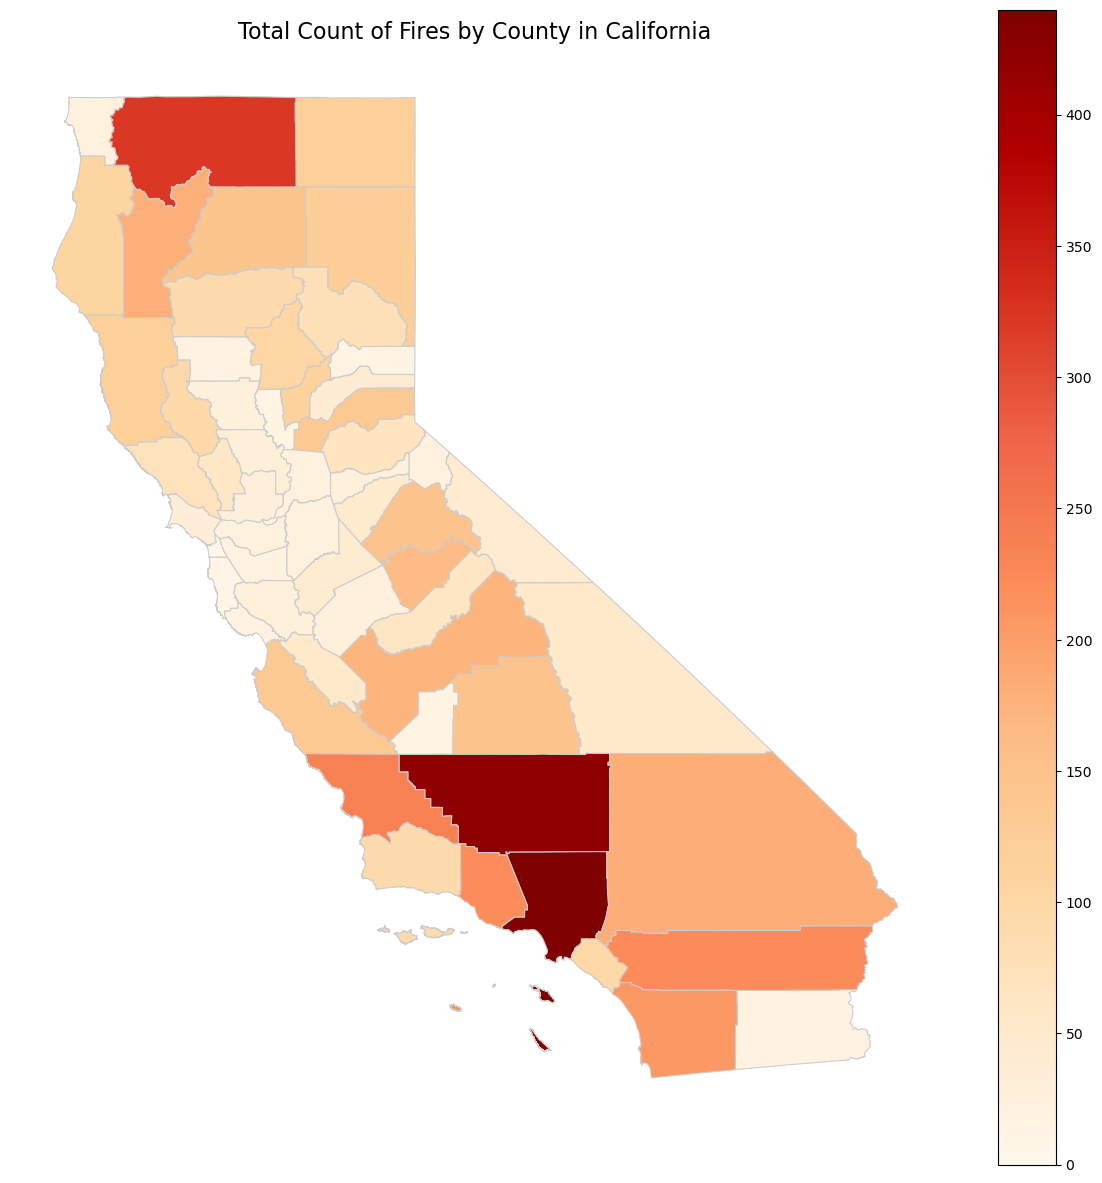

In [14]:
# Plot Map

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Set up the plot
fig, ax = plt.subplots(1, 1, figsize=(15, 15))

# Create the heat map by plotting the counties and coloring by the 'total_fires' column
gdf_counties_fires.plot(column='total_fires', cmap='OrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add a title
ax.set_title('Total Count of Fires by County in California', fontsize=16)

# Remove the axis for a cleaner look
ax.set_axis_off()

# Show the plot
plt.show()

# Fire perimeters by year from 2000 to 2023  
This code creates a .gif file that is too big to be stored on the repo.

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os

# Create a directory to store the individual frames
frames_dir = "../frames"
os.makedirs(frames_dir, exist_ok=True)

# Define a function to update the plot for each year
def update_and_save(year):
    ax.clear()
    ax.set_title(f'Fire Progression in California: {year}', fontsize=16)
    
    # Plot the counties
    gdf_counties.plot(ax=ax, color='none', edgecolor='black')
    
    # Filter for the current year's fires
    yearly_fires = gdf_perim_with_counties[gdf_perim_with_counties['YEAR_'] == year]
    
    # Only plot if there are fires for the given year
    if not yearly_fires.empty:
        yearly_fires.plot(ax=ax, color='red', alpha=0.5, edgecolor='none')
    
    # Remove axis for a cleaner look
    ax.set_axis_off()
    
    # Save the frame as an image
    frame_filename = os.path.join(frames_dir, f"frame_{year}.png")
    plt.savefig(frame_filename)
    print(f"Saved frame for year: {year}")

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Loop through each year and save the frames
for year in range(2008, 2023):
    update_and_save(year)

# Close the plot
plt.close()

Saved frame for year: 2008
Saved frame for year: 2009
Saved frame for year: 2010
Saved frame for year: 2011
Saved frame for year: 2012
Saved frame for year: 2013
Saved frame for year: 2014
Saved frame for year: 2015
Saved frame for year: 2016
Saved frame for year: 2017
Saved frame for year: 2018
Saved frame for year: 2019
Saved frame for year: 2020
Saved frame for year: 2021
Saved frame for year: 2022


In [16]:
import imageio.v2 as imageio  # Use v2 to maintain current behavior
import os

# Load all the frames and combine them into a GIF
frames_dir = "../frames"
frames = [os.path.join(frames_dir, f"frame_{year}.png") for year in range(2008, 2023)]
gif_filename = r'fire_progression_2000_2022.gif'

# Create the GIF
with imageio.get_writer(gif_filename, mode='I', fps=2) as writer:
    for frame in frames:
        image = imageio.imread(frame)
        writer.append_data(image)

print(f"GIF saved as: {gif_filename}")

GIF saved as: fire_progression_2000_2022.gif
